## Загрузка файла и ознакомление с ним

Импортируем необходимые библиотеки.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter

In [2]:
df = pd.read_csv('/datasets/data.csv')

In [3]:
display(df.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
display(df.tail())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Для цели исследования наиболее важные столбцы - дети и семейный статус. Посмотрим на распределение значений в них.

In [6]:
df['children'].value_counts().to_frame()

,children
0,14149
1,4818
2,2055
3,330
20,76
-1,47
4,41
5,9


In [7]:
df['family_status'].value_counts().to_frame()

,family_status
женат / замужем,12380
гражданский брак,4177
Не женат / не замужем,2813
в разводе,1195
вдовец / вдова,960


Со столбцом семейный статус нет никаких проблем, а столбец дети содержит 2 странных значения: -1 и 20. Взглянем на эти строки.

In [8]:
display(df[df['children'] == 20].head(5))
display(df[df['children'] == -1].head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,-855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,-3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,-2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,-2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
705,-1,-902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
742,-1,-3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,349987.852217,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,NaN,57,Среднее,1,женат / замужем,0,F,пенсионер,0,NaN,на покупку своего автомобиля


Ничего необычного нет. Скорее всего произошла ошибка в записи. 
Сделаем следующие предположения:
1. -1 появился из-за случайного добавления минуса к единице;
2. 20 - из-за случайного добавления нуля к двойке.

**Вывод**

В каждой строке таблицы находятся данные об одном клиенте банка. Помимо общей информации в таблице имеются данные о профессиональном стаже, семейном статусе и доходах клиентов.
Количество строк - 21525.

В таблице 12 столбцов. Стоит отметить, что в названиях столбцов не обнаружено нарушение стиля. 
Из 12 столбцов 5 имеют целочисленный тип, 2 - вещественный тип, остальные - текстовый.
Ошибки, которые бросаются в глаза уже на стадии ознакомления с данными:
1. Столбец *children* содержит 2 необычных значения: -1 и 20. Скорее всего это дожны быть 1 и 2, но произошла ошибка в записи данных.
2. Пропущенные данные в столбцах *days_employed* и *total_income*. Их количество одинаково, что наводит на мысль о том, что пропуски в данных столбцах могут быть связаны.
3. Столбец *days_employed* показывает трудовой стаж клиентов. Помимо довольно большого количества пропусков, стоит отметить странную запись - числа отрицательные. Однако некоторые числа положительные, но эти числа слишком высокие, ибо человек не может проработать 340266 дней, так как это порядка 1000 лет. Скорее всего, произошла ошибка в записи данных. Еще нетрудно заметить, что данная ошибка характера для клиентов, которые уже на пенсии. Нужно найти связь между этим и попытаться разгадать способ записи.
4. В столбце *education* есть ошибка с записью текста. В основном текст записан строчными буквами, однако в некоторых ячейках встречаются прописные буквы. На стадии предобработки весь текст в столбце должен быть написан строчными буквами. Стоит также отметить, что следующий столбец *education_id*, представляющий собой категории предыдущего, не содержит ошибок и корректно отражает категории образования, даже при неправильной записи в столбце образования.
5. В столбце *purpose* некоторые строки имеют одинаковый смысл, но разную запись, что может затруднить категоризацию. Данную проблему можно устронить с помощью лемматизации.

## Предобработка данных

### Обработка пропусков

Для начала посмотрим количество пропусков в каждом столбце датафрейма.

In [9]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски обнаружены лишь в двух столбцах, оба столбца содержат вещественный тип данных. 
Так как количество пропусков в двух столбцах одинаково, делаем предположение, что они связаны, и если банк не знает трудовой стаж клиента, то и доход ему неизвестен. Проверим данную гипотезу.

In [10]:
len(df[(df['days_employed'].isna()) & (df['total_income'].isna() == False)])

0

Количество строк, где пропущено значение в столбце *days_employed*, но не пропущено в столбце *total_income*, равно нулю. Следовательно, гипотеза подтвердилась.

#### Стратегия заполнения пропусков

Цель исследования - определить влияние семейного положения и количества детей клиента на факт погашения кредита в срок. В таком случае столбцы *days_employed* и *total_income* не представляют для нас особой ценности, и строки с пропущенными значениями можно просто выбросить, однако количество строк с пропусками довольно велико и составляет порядка 10% от всего набора данных. Если мы выбросим их, то потеряем много важной информации. Следовательно, данный способ нам не подходит.

Оба столбца содержат количественные данные, следовательно пропуски могут быть заполнены медианой или средним арифметическим. Однако существует проблема, что в столбце *days_employed* некоторые данные записаны некорректно. Как отмечалось в шаге 1, нереалистичные числа замечены для пенсионеров, но это еще нужно проверить. В таком случае медиана или среднее арифметическое могут дать некорректный результат. 

На мой взгляд, гораздо логичнее проверить связь между типом дохода и трудовым стажем и ежемесячным доходом. Если данная связь имеется, то пропуски можно заполнить медианным значением своей категории.

Несмотря на то, что данные столбцы не важны для цели исследования, я считаю, что корректное заполнение пропусков целесообразно, т.к. данный набор данных может в будущем использоваться для других целей.

Сгруппируем данные по типам дохода и посчитаем средний трудовой стаж для каждого типа. Тоже самое проделаем с ежемесячным доходом. 

In [11]:
df.groupby('income_type')[['days_employed']].mean()

,days_employed
income_type,
безработный,366413.652744
в декрете,-3296.759962
госслужащий,-3399.896902
компаньон,-2111.524398
пенсионер,365003.491245
предприниматель,-520.848083
сотрудник,-2326.499216
студент,-578.751554


In [12]:
df.groupby('income_type')[['total_income']].mean()

,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,170898.309923
компаньон,202417.461462
пенсионер,137127.465690
предприниматель,499163.144947
сотрудник,161380.260488
студент,98201.625314


И трудовой стаж, и ежемесячный доход разнятся по типу дохода.
Стоит также отметить, что трудовой стаж записан некорректно для пенсионеров и безработных. Чтобы в этом убедиться, построим гистрограммы для этих двух категорий.

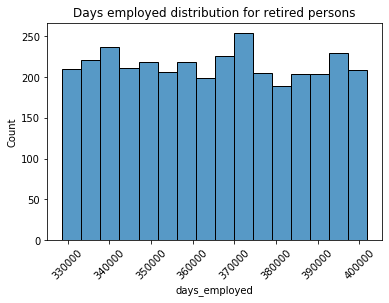

In [13]:
sns.histplot(df.query('income_type == "пенсионер"')['days_employed'])
plt.title('Days employed distribution for retired persons')
plt.xticks(rotation=45)
plt.show()

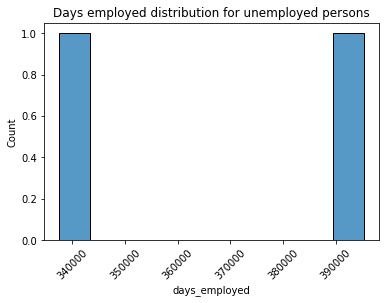

In [14]:
sns.histplot(df.query('income_type == "безработный"')['days_employed'], bins=10)
plt.title('Days employed distribution for unemployed persons')
plt.xticks(rotation=45)
plt.show()

Значения для этих двух групп находятся в диапазоне 330000-400000.
Можно предположить, что произошел сбой в системе записи данных. Вполне вероятно, что в данном случае стаж записан в часах, а не в днях. 



Наша изначальная гипотеза о связи типа дохода с трудовым стажем и доходом подтвердилась.
Теперь заполним пропуски по предложенной ранее стратегии: заполним трудовой стаж и доход медианным значением по типу дохода.

In [15]:
for type in df['income_type'].unique():
    median_income = df[df['income_type'] == type]['total_income'].dropna().median()      
    median_days_employed = df[df['income_type'] == type]['days_employed'].dropna().median()
    df.loc[(df['income_type'] == type) & (df['total_income'].isna()), 'total_income'] = median_income
    df.loc[(df['income_type'] == type) & (df['days_employed'].isna()), 'days_employed'] = median_days_employed

Проверим, не осталось ли пропущенных значений.

In [16]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

1. Пропуски были обнаружены в 2 вещественных столбцах - трудовой стаж и ежемесячный доход.
2. Пропуски неслучайные. Если пропущен трудовой стаж, то в той же строке нет и ежемесячного дохода.
3. Для пенсионеров и безработных трудовой стаж записан в некорректной форме. Нужно перевести его из часов в дни.
4. Пропуски были устранены путем их замены на медианное значение по типу дохода.

### Редактирование артефактов

Как отмечалось ранее, столбец *children* имеет 2 странных значения: -1 и 20. Заменим их на 1 и 2. 
Стоит отметить, что данные строки можно было бы попросту удалить, однако их количество невелико и наврядли повлияет на общий результат, поэтому рискнем и сохраним эти строки.

In [17]:
df['children'] = df['children'].apply(lambda x: 1 if x == -1 else (2 if x == 20 else x))

In [19]:
df['children'].value_counts().to_frame()

,children
0,14149
1,4865
2,2131
3,330
4,41
5,9


Как отмечалось ранее, нужно перевести трудовой стаж для пенсионеров и безработных из часы в дни.

In [20]:
df.loc[df['income_type'] == 'пенсионер', 'days_employed'] = df['days_employed'] / 24

In [21]:
df.loc[df['income_type'] == 'безработный', 'days_employed'] = df['days_employed'] / 24

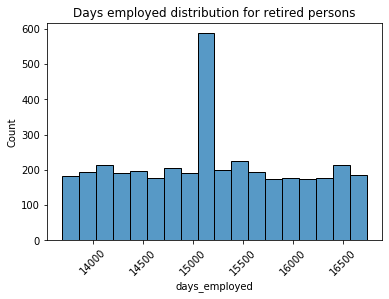

In [22]:
sns.histplot(df.query('income_type == "пенсионер"')['days_employed'])
plt.title('Days employed distribution for retired persons')
plt.xticks(rotation=45)
plt.show()

Теперь данные выглядят логичнее. 15000 дней это примерно 41 год.

Замением отрицательные значения в столбце *days_employed* на положительные. Проверку замены выполним с помощью гистрограммы.

In [23]:
df['days_employed'] = abs(df['days_employed'])

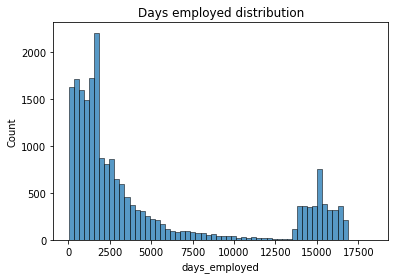

In [24]:
sns.histplot(df.query('days_employed < 50000')['days_employed'])
plt.title('Days employed distribution')
plt.show()

**Вывод**

1. Странные значения в столбце дети изменены на нормальные.
2. Трудовой стаж для пенсионеров и безработных переведен из часов в дни.
3. Отрицательный трудовой стаж изменен на положительный.

### Замена типа данных

Для начала вызовем общую информацию по таблице.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Общий трудовой стаж в днях является целой величиной. Произведем замену типа данных столбца.
Тоже самое проделаем с доходом, так как точность до копеек не нужна.

In [26]:
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = df['total_income'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Взглянем на первые 5 строк таблицы.

In [27]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


**Вывод**

1. 10 столбцов из 12 изначально имели верный тип данных.
2. Замена типа с данных с вещественного на целочисленный была произведена для столбцов *days_employed* и *total_income*.

### Обработка дубликатов

Сначала проверим неявные дубликаты в категориальных столбцах. 

In [28]:
df['education'].value_counts().to_frame()

,education
среднее,13750
высшее,4718
СРЕДНЕЕ,772
Среднее,711
неоконченное высшее,668
ВЫСШЕЕ,274
Высшее,268
начальное,250
Неоконченное высшее,47
НЕОКОНЧЕННОЕ ВЫСШЕЕ,29


In [29]:
df['family_status'].value_counts().to_frame()

,family_status
женат / замужем,12380
гражданский брак,4177
Не женат / не замужем,2813
в разводе,1195
вдовец / вдова,960


In [30]:
df['income_type'].value_counts().to_frame()

,income_type
сотрудник,11119
компаньон,5085
пенсионер,3856
госслужащий,1459
безработный,2
предприниматель,2
в декрете,1
студент,1


Категории в столбце образование дублируются из-за записи в разных регистрах. 
Переведем все текстовые столбцы в нижний регистр и проверим уникальные значения столбца образование.

In [31]:
for col in df.select_dtypes(include = 'object').columns:
    df[col] = df[col].str.lower()
    
df['education'].value_counts().to_frame()

,education
среднее,15233
высшее,5260
неоконченное высшее,744
начальное,282
ученая степень,6


Количество дубликатов:

In [32]:
df.duplicated().sum()

71

Строки, являющиеся дубликатами (включая первое вхождение):

In [33]:
df[df.duplicated(keep=False)].sort_values(by='dob_years', ascending=False).head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
7938,0,15217,71,среднее,1,гражданский брак,1,f,пенсионер,0,118514,на проведение свадьбы
9604,0,15217,71,среднее,1,гражданский брак,1,f,пенсионер,0,118514,на проведение свадьбы
6537,0,15217,71,среднее,1,гражданский брак,1,f,пенсионер,0,118514,на проведение свадьбы
5865,0,15217,66,среднее,1,вдовец / вдова,2,f,пенсионер,0,118514,операции со своей недвижимостью
9528,0,15217,66,среднее,1,вдовец / вдова,2,f,пенсионер,0,118514,операции со своей недвижимостью


Строки дубликаты изначально имели пропущенные значения. Это видно по одному и тому же значению в столбцах дохода и трудового стажа. Это медиана, которую мы использовали в шаге 2.1.
Общее число дубликатов - 71, это меньше 0.35% набора данных.

Удаляем все строки дубликаты.

In [34]:
df = df.drop_duplicates().reset_index(drop=True)

Выполняем проверку.

In [35]:
df.duplicated().sum()

0

**Вывод**

1. Все строки в текстовых столбцах переведены в нижний регистр. Таким образом удалось избежать неявных дубликатов.
2. 71 дубликат был удален из набора данных.

### Лемматизация

Проведем лемматизацию для столбца *purpose*.
Для начала посмотрим на все возможные значения в столбце.

In [36]:
df['purpose'].value_counts().to_frame()

,purpose
свадьба,791
на проведение свадьбы,768
сыграть свадьбу,765
операции с недвижимостью,675
покупка коммерческой недвижимости,661
операции с жильем,652
покупка жилья для сдачи,651
операции с коммерческой недвижимостью,650
покупка жилья,646
жилье,646


Мы можем видеть большое число похожих по смыслу причин, но отличающихся написанием. Исправим это лемматизацией.

In [37]:
m = Mystem()

df['purpose_lemma'] = df['purpose'].apply(m.lemmatize)

Посчитаем количество вхождений каждой леммы.

In [39]:
m = Mystem()

print(Counter(m.lemmatize(' '.join(df['purpose'].to_list()))))

Counter({' ': 55023, 'недвижимость': 6351, 'покупка': 5897, 'жилье': 4460, 'автомобиль': 4306, 'образование': 4013, 'с': 2918, 'операция': 2604, 'свадьба': 2324, 'свой': 2230, 'на': 2222, 'строительство': 1878, 'высокий': 1374, 'получение': 1314, 'коммерческий': 1311, 'для': 1289, 'жилой': 1230, 'сделка': 941, 'дополнительный': 906, 'заниматься': 904, 'подержать': 853, 'проведение': 768, 'сыграть': 765, 'сдача': 651, 'семья': 638, 'собственный': 635, 'со': 627, 'ремонт': 607, 'приобретение': 461, 'профильный': 436, 'подержанный': 111, '\n': 1})


Видно, что целей кредита всего 5: недвижимость, жилье, автомобиль, образование и свадьба. 
Еще довольно часто встречается "операция", но выше мы видели, что она употребляется в смысле "операции с недвижимостью". Также запутать может "строительство", но опять же в контексте это "строительство собственной недвижимости".

Объединим недвижимость и жилье в одну категорию с именем недвижимость.
На основе полученных данных можно перезаписать столбец с целью, заменив все похожие записи лишь их леммой.

In [44]:
purpose_lemmas = {'недвижимость' : 'недвижимость', 'жилье' : 'недвижимость', 'автомобиль' : 'автомобиль',
                  'образование' : 'образование', 'свадьба' : 'свадьба'}

def assign_lemma(row):
    for lemma, new_purpose in purpose_lemmas.items():
        if lemma in row:
            return new_purpose
    return 'другое'
        
df['purpose_lemma'] = df['purpose_lemma'].apply(assign_lemma)

Проверим значения в получившемся столбце.

In [45]:
df['purpose_lemma'].value_counts().to_frame()

,purpose_lemma
недвижимость,10811
автомобиль,4306
образование,4013
свадьба,2324


Исходный столбец можно удалить.

In [46]:
df = df.drop('purpose', axis=1)

Посмотрим на первые 5 строк таблицы.

In [47]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_lemma
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,образование
4,0,14177,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,свадьба


**Вывод**

Лемматизация была применена к столбцу "цель кредита", что позволило получить куда более удачную форму представления. По-разному записанные, но одинаковые по смыслу цели были заменены леммой основного слова, что сократило количество целей кредита до 4.

### Категоризация данных

Создадим столбец, показывающий, есть ли у клиента дети или нет.

In [71]:
df['children_status'] = 'нет детей'
df.loc[df['children'] > 0, 'children_status'] = 'есть дети'

Для дальнейшего анализа стоит разделить людей на категории по возрасту и по доходу.
Сначала посмотрим на распределение клиентов по возрасту.

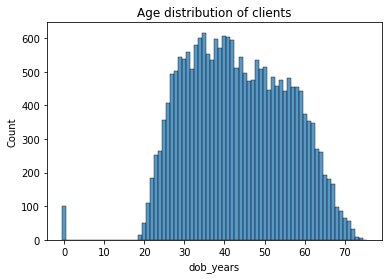

In [50]:
sns.histplot(df['dob_years'], discrete=True)
plt.title('Age distribution of clients')
plt.show()

Видно, что наибольшее число клиентов в возрасте 30-40 лет, самые старые клиенты моложе 80, а самые молодые - 18-летние.

В данных присутствует артефакт, говорящий что некоторым клиентам 0 лет, чего естественно не может быть. Предполагаем, что данный 0 является способом заполения пропусков.
Так как это было пропущено на стадии обработки пропусков, обработаем эти пропуски перед категоризацией. Для начала взглянем на строки, где возраст отмечен как 0.

In [51]:
df[df['dob_years'] == 0].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_lemma
99,0,14439,0,среднее,1,женат / замужем,0,f,пенсионер,0,71291,автомобиль
149,0,2664,0,среднее,1,в разводе,3,f,сотрудник,0,70176,недвижимость
270,3,1872,0,среднее,1,женат / замужем,0,f,сотрудник,0,102166,недвижимость
578,0,16577,0,среднее,1,женат / замужем,0,f,пенсионер,0,97620,недвижимость
1040,0,1158,0,высшее,0,в разводе,3,f,компаньон,0,303994,автомобиль


Какую-либо взаимосвязь отметить сложно. Эти пропуски случайные. Их причиной скорее всего является ошибка при загрузке данных.

Столбец "тип дохода" можно косвенно связать с возрастом. Пенсионеру не может быть 20 лет, а студенты обычно намного моложе 60. Следовательно заполним пропуски медианным значением по типу дохода.

In [52]:
for type in df['income_type'].unique():
    median_age = df[df['income_type'] == type]['dob_years'].dropna().median()
    df.loc[(df['income_type'] == type) & (df['dob_years'] == 0), 'dob_years'] = median_age

Проверим замену.

In [53]:
df[df['dob_years'] == 0].head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_lemma


Разделим клиентов на возрастные группы по следующему правилу:
* до 30 включительно: молодые
* 31-60: взрослые
* 61 и более: пожилые

In [54]:
def age_group(row):
    if row <= 30:
        return 'молодые'
    elif 30 < row <= 60:
        return 'взрослые'
    return 'пожилые'

In [55]:
df['age_group'] = df['dob_years'].apply(age_group)

In [56]:
df[['dob_years', 'age_group']].head()

,dob_years,age_group
0,42.0,взрослые
1,36.0,взрослые
2,33.0,взрослые
3,32.0,взрослые
4,53.0,взрослые


Категоризация по возрасту проведена успешно.

Посмотрим на распределение по доходу.

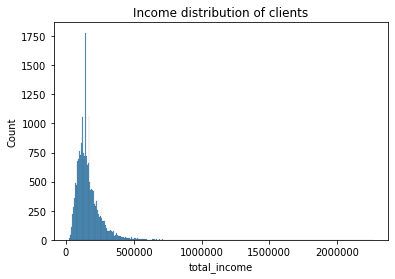

In [58]:
sns.histplot(df['total_income'])
plt.title('Income distribution of clients')
plt.show()

У банка есть клиенты с очень высоким доходом, что не дает посмотреть на распределение дохода у основной массы клиентов. 
Сделаем распределение лишь по клиентам с доходом меньше 500 тыс. рублей.

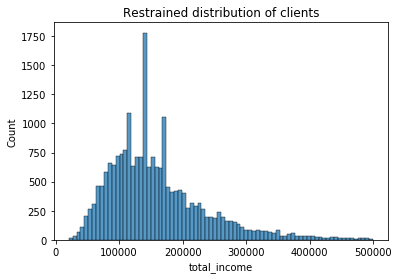

In [61]:
sns.histplot(df.query('total_income < 500000')['total_income'])
plt.title('Restrained distribution of clients')
plt.show()

Клиенты банка имеют совершенно разные доходы, от очень низкого до очень высокого. Наибольшее количество клиентов имеет ежемесячный доход в районе 100-160 тыс. рублей. 

Разделим клиентов на группы по доходам, разделив всех клиентов на 4 равные по размеру группы.

In [62]:
pd.qcut(df['total_income'], 4).value_counts().to_frame()

,total_income
"(107623.0, 142594.0]",5479
"(195820.25, 2265604.0]",5364
"(20666.999, 107623.0]",5364
"(142594.0, 195820.25]",5247


По полученным диапазонам разделим клиентов на 4 группы по доходу:
1. Низкий: до 107623.857 руб.
2. Средний от 107623.857 до 142594.397 руб.
3. Выше среднего: от 142594.397 до 195820.926 руб.
4. Высокий: свыше 195820.926 руб.

In [63]:
def income_group(row):
    if row <= 107623.857:
        return 'низкий'
    elif 107623.857 < row <= 142594.397:
        return 'средний'
    elif 142594.397 < row <= 195820.926:
        return 'выше среднего'
    return 'высокий'

In [64]:
df['income_group'] = df['total_income'].apply(income_group)

In [65]:
df[['total_income', 'income_group']].head()

,total_income,income_group
0,253875,высокий
1,112080,средний
2,145885,выше среднего
3,267628,высокий
4,158616,выше среднего


Категоризация по доходу проведена успешна. 

**Вывод**

1. Проведена категоризация клиентов по возрасту. Выделены следующие возрастные группы: молодые (до 30 лет включительно), взрослые (31-60), пожилые (61 и старше).
2. Проведена категоризация клиентов по доходу. Выделены 4 группы клиентов.

Данные после предобработки имеют следующий вид.

In [68]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,income_type_id,debt,total_income,purpose_lemma,purpose_id,age_group,income_group
0,1,8437,42.0,высшее,0,женат / замужем,0,f,сотрудник,2,0,253875,недвижимость,0,взрослые,высокий
1,1,4024,36.0,среднее,1,женат / замужем,0,f,сотрудник,2,0,112080,автомобиль,2,взрослые,средний
2,0,5623,33.0,среднее,1,женат / замужем,0,m,сотрудник,2,0,145885,недвижимость,0,взрослые,выше среднего
3,3,4124,32.0,среднее,1,женат / замужем,0,m,сотрудник,2,0,267628,образование,1,взрослые,высокий
4,0,14177,53.0,среднее,1,гражданский брак,1,f,пенсионер,7,0,158616,свадьба,3,взрослые,выше среднего


## Анализ данных

В данном пункте попытаемся выяснить, какие факторы влияют на возврат кредита в срок.

 - Определим, есть ли зависимость между наличием детей и возвратом кредита в срок.

In [69]:
def pivot_table(category):
    '''
    Данная функция строит сводную таблицу по интересующему нас столбцу.
    Цель - оценка влияния фактора на факт возврата кредита в срок.
    На выходе получаем процент должников, суммарное число клиентов в групе и абсолютное число должников.
    '''
    table = df.pivot_table(index = category, values = 'debt', aggfunc = ['mean', 'count'])
    table['clients_with_debts'] = table['mean']['debt'] * table['count']['debt']
    display(table)

In [72]:
pivot_table('children_status')

,mean,count,clients_with_debts
,debt,debt,
children_status,,,
есть дети,0.092082,7363,678.0
нет детей,0.075438,14091,1063.0


Первый столбец показывает процент невозвращенных кредитов, второй столбец - количество клиентов в каждой группе, а третий столбец - количество клиентов в каждой группе, которые имеют задолженность.

Клиенты без детей более вероятно возвращают кредит в срок.

In [73]:
pivot_table('children')

,mean,count,clients_with_debts
,debt,debt,
children,,,
0,0.075438,14091,1063.0
1,0.091658,4855,445.0
2,0.094925,2128,202.0
3,0.081818,330,27.0
4,0.097561,41,4.0
5,0.000000,9,0.0


Первый столбец показывает процент невозвращенных кредитов, второй столбец - количество клиентов в каждой группе, а третий столбец - количество клиентов в каждой группе, которые имеют задолженность.

Чем больше детей, чем выше вероятность невозвращения в срок. 
Стоит отметить, что клиенты с тремя детьми выбиваются из общего ряда. Это может быть связано с размером выборки.
Лишь небольшое количество клиентов (380) имеют 3 и более детей. Этой информации может быть недостаточно для окончательной оценки.

**Вывод**

1. Существует зависимость между наличием детей и возвратом кредита в срок. Бездетные клиенты чаще возвращают кредит. 7.5% бездетных клиентов имеют долг, для клиентов с 1 или 2 детьми это значение превышает 9%.
2. Количество клиентов с 3 и более детьми на порядок меньше, чем клиентов с 1 или 2 детьми, следовательно эти данные могут быть нерепрезентативными, поэтому сделать однозначные выводы по этим категориям сложно

- Определим, есть ли зависимость между семейным положением и возвратом кредита в срок.

In [74]:
pivot_table('family_status')

,mean,count,clients_with_debts
,debt,debt,
family_status,,,
в разводе,0.071130,1195,85.0
вдовец / вдова,0.065693,959,63.0
гражданский брак,0.093471,4151,388.0
женат / замужем,0.075452,12339,931.0
не женат / не замужем,0.097509,2810,274.0


Первый столбец показывает процент невозвращенных кредитов, второй столбец - количество клиентов в каждой группе, а третий столбец - количество клиентов в каждой группе, которые имеют задолженность.

Прослеживается зависимость между семейным положеним и возвратом кредита в срок. Одинокие клиенты и клиенты, состоящие в гражданском браке не возвращают кредит в более, чем 9% случаев. Для остальных групп это значение меньше на несколько процентов.

Составим сводную таблицу, показывающую влияние количества детей и семейного статуса на возвращение кредита в срок. 
Также добавим сводную таблицу с количество клиентов в каждой группе.

In [75]:
df.pivot_table(index = 'family_status', columns = 'children', values = 'debt', aggfunc = 'mean')

children,0,1,2,3,4,5
family_status,,,,,,
в разводе,0.070153,0.066456,0.096386,0.090909,0.000000,NaN
вдовец / вдова,0.062574,0.086420,0.125000,0.000000,0.000000,NaN
гражданский брак,0.083883,0.118000,0.092958,0.142857,0.000000,0.0
женат / замужем,0.069095,0.082224,0.093552,0.068273,0.103448,0.0
не женат / не замужем,0.092838,0.114537,0.119048,0.125000,0.500000,NaN


In [76]:
df.pivot_table(index = 'family_status', columns = 'children', values = 'debt', aggfunc = 'count')

children,0,1,2,3,4,5
family_status,,,,,,
в разводе,784.0,316.0,83.0,11.0,1.0,NaN
вдовец / вдова,847.0,81.0,24.0,6.0,1.0,NaN
гражданский брак,2730.0,1000.0,355.0,56.0,8.0,2.0
женат / замужем,7468.0,3004.0,1582.0,249.0,29.0,7.0
не женат / не замужем,2262.0,454.0,84.0,8.0,2.0,NaN


Видно, что наибольшую вероятность не вернуть кредит в срок имеют одинокие клиенты с 1 или 2 детьми, клиенты, состоящие в гражданском браке, с 1 ребенком и вдовцы/вдовы с 2 детьми. Свыше 11% клиентов имеют задолженность. 
В целом по таблице просматривается тенденция к росту вероятности невозвращения кредит в срок с увеличением количества детей.
Стоит отметить, что некоторые группы значительно меньше других, что может стать причиной непрезентативности данных. 

**Вывод**

1. Существует зависимость между семейным положением и возвратом кредита в срок.
2. Клиенты, состоящие или состоявшие в официальном браке имеют меньше задолженностей чем одинокие клиенты и клиенты в гражданском браке.
3. Наличие детей увеличивает шанс невозврата для всех групп семейного статуса.

- Проверим, есть ли зависимость между уровнем дохода и возвратом кредита в срок.

In [77]:
pivot_table('income_group')

,mean,count,clients_with_debts
,debt,debt,
income_group,,,
высокий,0.071402,5364,383.0
выше среднего,0.085382,5247,448.0
низкий,0.079605,5364,427.0
средний,0.088155,5479,483.0


Первый столбец показывает процент невозвращенных кредитов, второй столбец - количество клиентов в каждой группе, а третий столбец - количество клиентов в каждой группе, которые имеют задолженность.

**Вывод**

1. Прослеживается зависимость между доходом и возвратом кредита в срок.
2. Наибольшее количество должников имеют средний доход. С увеличением дохода шанс невозврата снижается. 
3. Клиенты с низким доходом имеют задолженности реже, чем клиенты со средним доходом и доходом выше среднего, но чаще, чем клиенты с высоким доходом.

- Посмотрим, как разные цели кредита влияют на его возврат в срок.

In [78]:
pivot_table('purpose_lemma')

,mean,count,clients_with_debts
,debt,debt,
purpose_lemma,,,
автомобиль,0.093590,4306,403.0
недвижимость,0.072334,10811,782.0
образование,0.092200,4013,370.0
свадьба,0.080034,2324,186.0


Первый столбец показывает процент невозвращенных кредитов, второй столбец - количество клиентов в каждой группе, а третий столбец - количество клиентов в каждой группе, которые имеют задолженность.

Составим сводную таблицу, показывающую влияние группы дохода и цели кредита на возвращение кредита в срок. Также добавим сводную таблицу с количество клиентов в каждой группе.

In [79]:
df.pivot_table(index='income_group', columns='purpose_lemma', values='debt', aggfunc='mean')

purpose_lemma,автомобиль,недвижимость,образование,свадьба
income_group,,,,
высокий,0.085399,0.067514,0.079449,0.050347
выше среднего,0.103143,0.075712,0.093719,0.084229
низкий,0.096743,0.067638,0.087332,0.089701
средний,0.090043,0.078540,0.107422,0.095238


In [80]:
df.pivot_table(index='income_group', columns='purpose_lemma', values='debt', aggfunc='count')

purpose_lemma,автомобиль,недвижимость,образование,свадьба
income_group,,,,
высокий,1089,2755,944,576
выше среднего,1018,2668,1003,558
низкий,1044,2676,1042,602
средний,1155,2712,1024,588


**Вывод**

1. Кредиты, связанные с недвижимостью, возвращаются чаще всего. Количество невозвратов 7.2%.
2. Наибольшее число невозвратов связано с кредитами на автомобиль или образование, свыше 9% кредитов не было возвращено.
3. Данные зависимости характерны для всех категорий дохода. Только низкой количество задолженностей (около 5%) для клиентов с высоких доходом, берущим кредит на свадьбу, выбивается из общего ряда.

## Общий вывод

1. В данной работе исследовался набор данных о платежеспособности клиентов банка. Изначально набор данных содержал 21525 строк и 12 столбцов.
2. На стадии предобработки данных было выполнено следующее:
    1. Заполнены пропуски.
    2. Обработаны явные и неявные дубликаты.
    3. Обнаружена ошибка с записью трудового стажа для пенсионеров и безработных. 
    4. Проведена категоризация клиентов по возрасту, доходу и цели кредита.
3. Данные позволили сделать следующие выводы о влиянии разных параметров на факт возврата кредита:
    1. Клиенты без детей реже имеют задолженности: 7.5% против 9.2% для клиентов с детьми.
    2. Клиенты, состоящие или состоявшие в официальном браке имеют меньше задолженностей, чем одинокие клиенты и клиенты в гражданском браке.
    3. Наибольшее количество должников имеют средний доход. С увеличением дохода шанс невозврата снижается.
    4. Кредиты на недвижимость возвращаются в срок чаще всего (около 7% должников). Наибольшее число невозвратов у кредитов на автомобиль и образование - свыше 9% кредитов не было возвращено в срок.